# The required libraries are imported here

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import style
style.use('ggplot')
import re
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.layers import Input, LSTM, RepeatVector, TimeDistributed, Dense, Embedding, Dropout, InputLayer
from tensorflow.keras.optimizers import Adam
import tensorflow_hub as hub
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import warnings
warnings.filterwarnings('ignore')

2024-07-14 17:16:18.016612: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-14 17:16:18.016750: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-14 17:16:18.214302: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
from sklearn.ensemble import RandomForestClassifier

# File load

In [4]:
df=pd.read_csv("/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# Data Analysis

In [5]:
df.shape

(50000, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


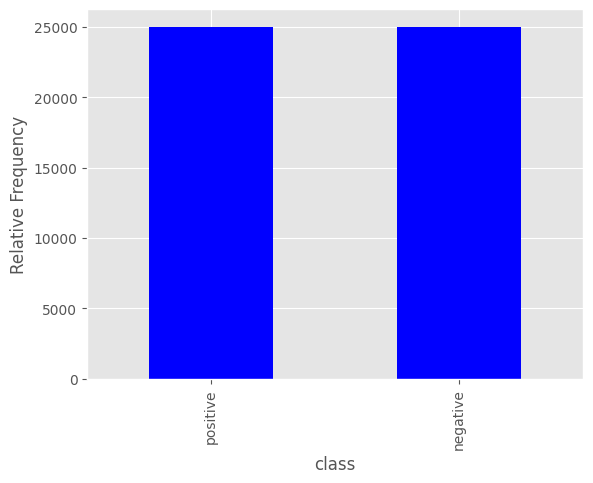

In [7]:
# Plot value counts of `"target"`
df["sentiment"].value_counts().plot(
 kind="bar",xlabel="class",ylabel="Relative Frequency",color='blue'  
);

****This indicates the dataset is balanced

In [8]:
df["review"].head()

0    One of the other reviewers has mentioned that ...
1    A wonderful little production. <br /><br />The...
2    I thought this was a wonderful way to spend ti...
3    Basically there's a family where a little boy ...
4    Petter Mattei's "Love in the Time of Money" is...
Name: review, dtype: object

In [9]:
 print(df['review'][0], "\n")

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

In [10]:
def no_of_words(text):
    words= text.split()
    word_count = len(words)
    return word_count

In [11]:
df['word count'] = df['review'].apply(no_of_words)

In [12]:
df.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230


In [13]:
#transforming sentiment labels into binary form
df.sentiment.replace("positive", 1, inplace=True)
df.sentiment.replace("negative", 0, inplace=True)

In [14]:
df.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there's a family where a little boy ...,0,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230


# Data preprocessing

In [15]:
#text preprocessing
def data_processing(text):
    text= text.lower()
    text = re.sub('<br />', '', text)
    text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags = re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [16]:
df["Clean_review"] = df['review'].apply(data_processing)

In [17]:
df.head()


,review,sentiment,word count,Clean_review
0,One of the other reviewers has mentioned that ...,1,307,one reviewers mentioned watching 1 oz episode ...
1,A wonderful little production. <br /><br />The...,1,162,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,1,166,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,0,138,basically theres family little boy jake thinks...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230,petter matteis love time money visually stunni...


In [18]:
 print(df['Clean_review'][0], "\n")

one reviewers mentioned watching 1 oz episode youll hooked right exactly happened methe first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far awayi would say main appeal show due fact goes shows wouldnt dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away well mannered middle c

In [19]:
duplicated_count = df.duplicated().sum()
print("Number of duplicate entries: ", duplicated_count)

Number of duplicate entries:  418


In [20]:
df = df.drop_duplicates('Clean_review')

In [21]:
# Snowball Stemmer
snowball = SnowballStemmer("english")
def stemming(data):
    snowball_stemmed = ' '.join([snowball.stem(word) for word in data])
    return data

In [22]:
df.Clean_review = df['Clean_review'].apply(lambda x: stemming(x))

In [23]:
df['word count'] = df['Clean_review'].apply(no_of_words)
df.head()

,review,sentiment,word count,Clean_review
0,One of the other reviewers has mentioned that ...,1,168,one reviewers mentioned watching 1 oz episode ...
1,A wonderful little production. <br /><br />The...,1,84,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,1,86,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,0,67,basically theres family little boy jake thinks...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,125,petter matteis love time money visually stunni...


In [24]:
df.drop(columns="review",inplace=True)

Important Words for each type of review**** 

In [25]:
pos_reviews =  df[df.sentiment == 1]
pos_reviews.head()

,sentiment,word count,Clean_review
0,1,168,one reviewers mentioned watching 1 oz episode ...
1,1,84,wonderful little production filming technique ...
2,1,86,thought wonderful way spend time hot summer we...
4,1,125,petter matteis love time money visually stunni...
5,1,58,probably alltime favorite movie story selfless...


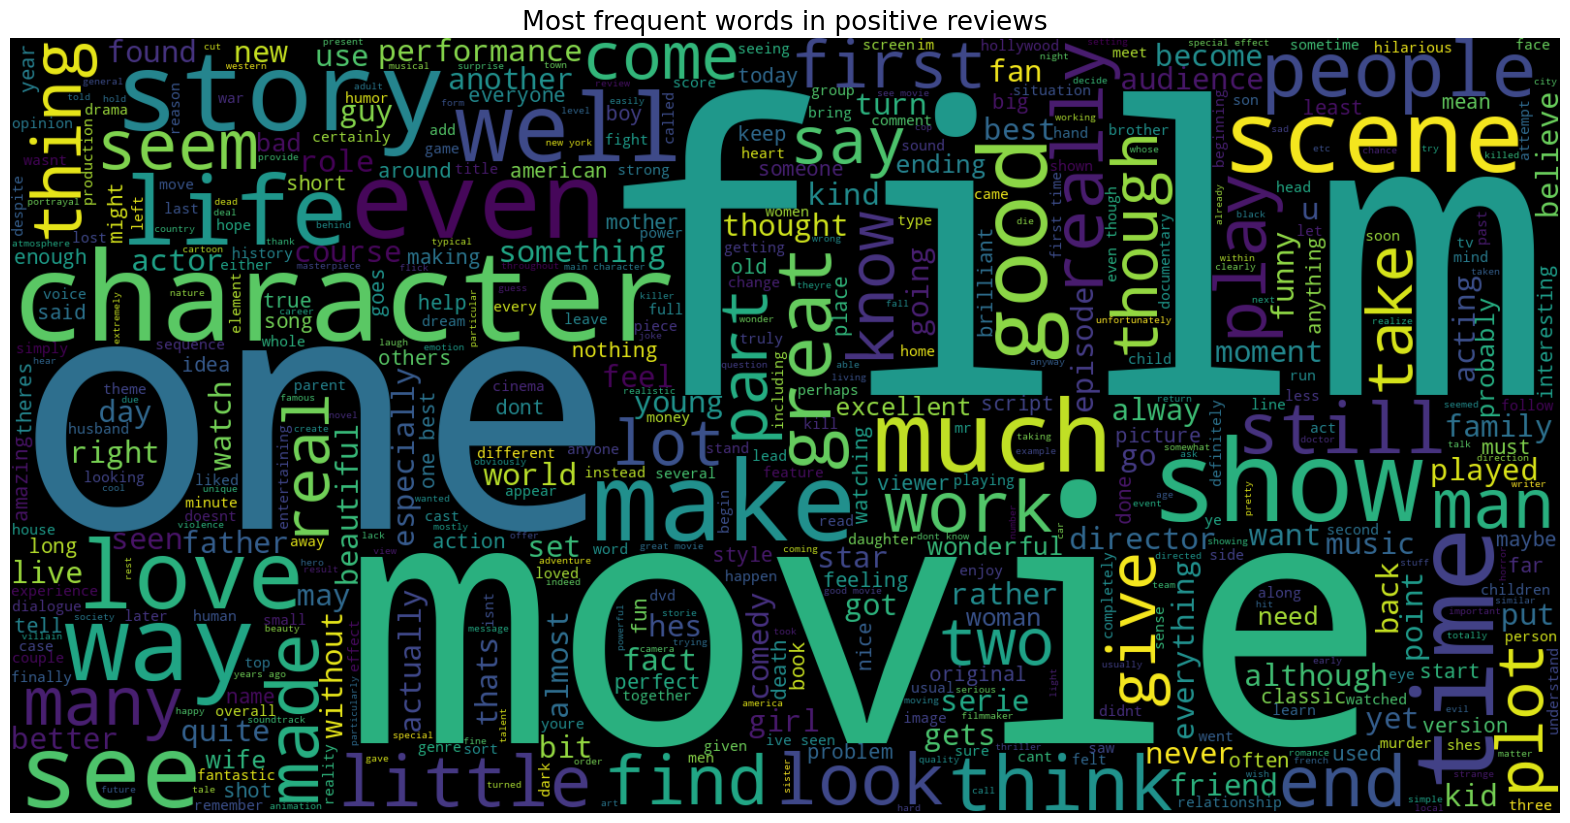

In [26]:
text = ' '.join([word for word in pos_reviews['Clean_review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive reviews', fontsize = 19)
plt.show()

In [27]:
neg_reviews =  df[df.sentiment == 0]
neg_reviews.head()

,sentiment,word count,Clean_review
3,0,67,basically theres family little boy jake thinks...
7,0,83,show amazing fresh innovative idea 70s first a...
8,0,64,encouraged positive comments film looking forw...
10,0,51,phil alien one quirky films humour based aroun...
11,0,84,saw movie 12 came recall scariest scene big bi...


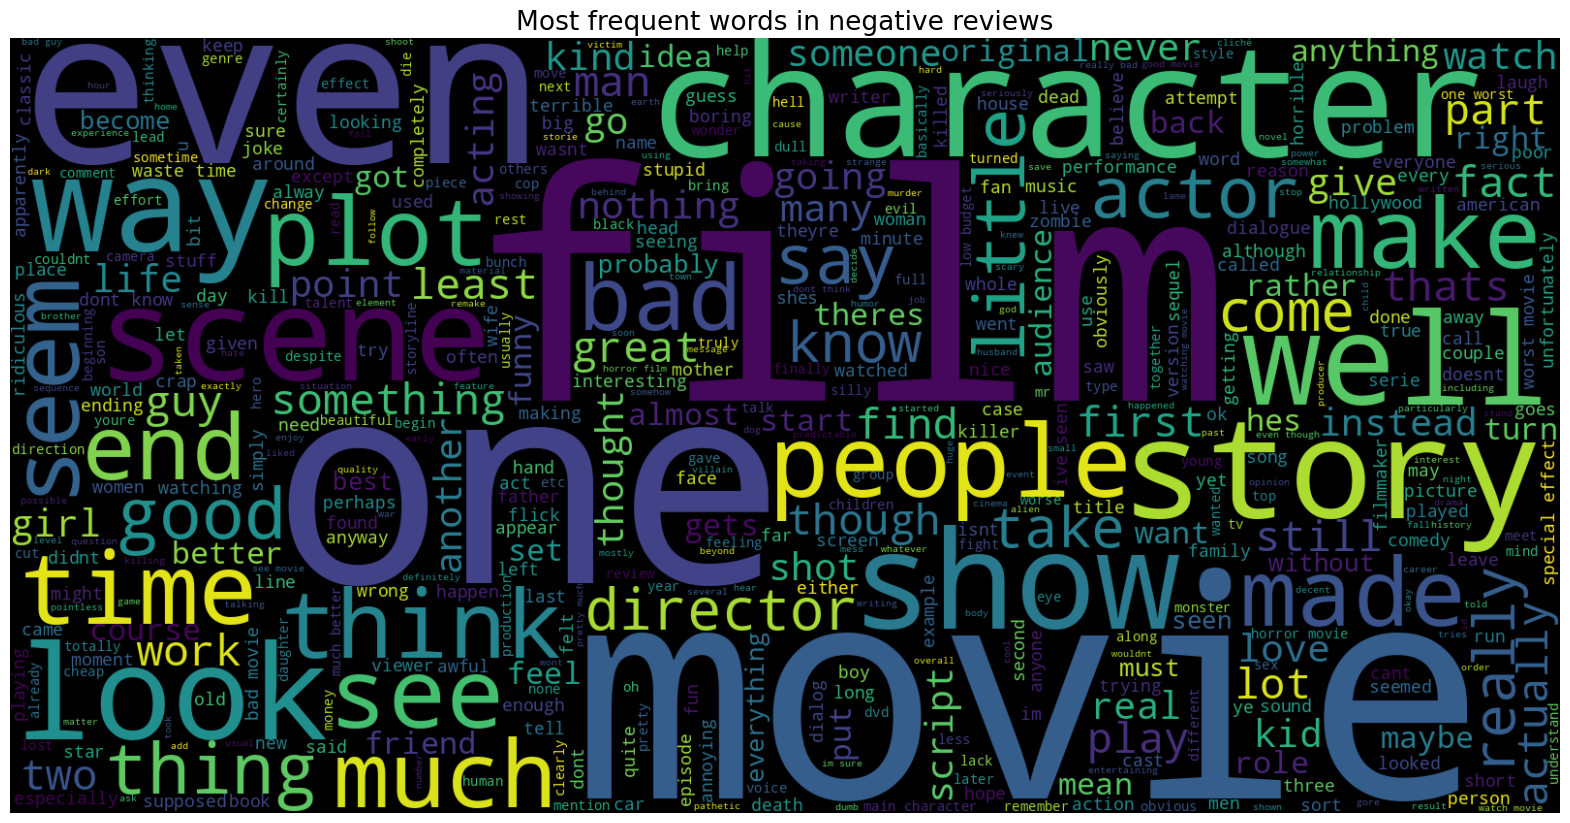

In [28]:
text = ' '.join([word for word in neg_reviews['Clean_review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negative reviews', fontsize = 19)
plt.show()

# Training The Model

**** Dividing into features matrix and target vector

In [29]:
X = df['Clean_review']
y = df['sentiment']

# Feature vectorization for ML models 

In [30]:
#vectorize the features 
vector = TfidfVectorizer()
X = vector.fit_transform(df['Clean_review'])

In [31]:
#splitting for model building
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [32]:
print("Size of train_x: ", (train_x.shape))
print("Size of train_y: ", (train_y.shape))
print("Size of test_x: ", (test_x.shape))
print("Size of test_y: ", (test_y.shape))

Size of train_x:  (39662, 221707)
Size of train_y:  (39662,)
Size of test_x:  (9916, 221707)
Size of test_y:  (9916,)


# Logistic Regression

In [33]:
LR = LogisticRegression()
LR.fit(train_x, train_y)
LR_pred = LR.predict(test_x)
LR_acc = accuracy_score(LR_pred, test_y)
print("Test accuracy: {:.2f}%".format(LR_acc*100))

Test accuracy: 89.20%


In [34]:
print(classification_report(test_y, LR_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4845
           1       0.89      0.90      0.90      5071

    accuracy                           0.89      9916
   macro avg       0.89      0.89      0.89      9916
weighted avg       0.89      0.89      0.89      9916



# MultinomialNB

In [35]:
MNB = MultinomialNB()
MNB.fit(train_x, train_y)
MNB_pred = MNB.predict(test_x)
MNB_acc = accuracy_score(MNB_pred, test_y)
print("Test accuracy : {:.2f}%".format(MNB_acc*100))

Test accuracy : 86.32%


In [36]:
print(classification_report(test_y, MNB_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      4845
           1       0.88      0.85      0.86      5071

    accuracy                           0.86      9916
   macro avg       0.86      0.86      0.86      9916
weighted avg       0.86      0.86      0.86      9916



In [37]:
df_mnb_pred=pd.DataFrame({'test_y': test_y, "predicted_y": MNB_pred})
df_mnb_pred.head(10)

,test_y,predicted_y
25719,1,1
44419,1,1
33615,0,1
147,1,1
20416,0,0
32999,0,0
46932,0,1
5868,1,1
22666,0,0
32371,1,1


# Random forest

In [38]:
#Random Forest
RF = RandomForestClassifier(n_estimators=100, random_state=42)
RF.fit(train_x, train_y)
RF_pred = RF.predict(test_x)
RF_acc = accuracy_score(RF_pred, test_y)
print("Test accuracy of Random Forest: {:.2f}%".format(RF_acc*100))

Test accuracy of Random Forest: 84.68%


In [39]:
print(classification_report(test_y, RF_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      4845
           1       0.85      0.84      0.85      5071

    accuracy                           0.85      9916
   macro avg       0.85      0.85      0.85      9916
weighted avg       0.85      0.85      0.85      9916



# Deep Learning Model

In [40]:
#applying neural network
X1 = df['Clean_review']
y1 = df['sentiment']

In [41]:
X1.head()

0    one reviewers mentioned watching 1 oz episode ...
1    wonderful little production filming technique ...
2    thought wonderful way spend time hot summer we...
3    basically theres family little boy jake thinks...
4    petter matteis love time money visually stunni...
Name: Clean_review, dtype: object

In [42]:
#splitting for model building
train_x1, test_x1, train_y1, test_y1 = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [43]:
#applying neural network
max_words = 5000
max_length = 100 
tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(train_x1)

train_x1_sequences = tokenizer.texts_to_sequences(train_x1)
test_x1_sequences = tokenizer.texts_to_sequences(test_x1)

train_x1_padded = pad_sequences(train_x1_sequences, maxlen=max_length, padding='post', truncating='post')
test_x1_padded = pad_sequences(test_x1_sequences, maxlen=max_length, padding='post', truncating='post')

In [44]:
# Print some samples and shapes to verify
print("Size of train_x1_padded: ", train_x1_padded.shape)
print("Size of train_y1: ", train_y1.shape)
print("Size of test_x1_padded: ", test_x1_padded.shape)
print("Size of test_y1: ", test_y1.shape)
print("Sample train_x1_padded: ", train_x1_padded[:2])
print("Sample train_y1: ", train_y1[:2])

Size of train_x1_padded:  (39662, 100)
Size of train_y1:  (39662,)
Size of test_x1_padded:  (9916, 100)
Size of test_y1:  (9916,)
Sample train_x1_padded:  [[ 131  142  289  100   43   31   42 1061   22  176  169  553  768  682
   553 1283 4911 1907  636  464   97   23   28  197  218  346 3906  756
  4566  944  142   21   43   22    7  863  199 3539 4451  352 1166  179
    22 1166 2161 4376 1038 2450   50  250 1408 3539 4451   22  176  863
   944  320 1166 2161 3539 4451  162  186    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [3958 1880   91  552  328    1  108  828  546  111 1039   38  821   23
  1045  244    3  272    1  170   33  514   17   15  150  433  254    1
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    

In [45]:
model_LSTM = Sequential([
    Embedding(input_dim=max_words, output_dim=64, input_length=max_length),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(1, activation = "sigmoid")
])
model_LSTM.build(input_shape=(None, max_length))
model_LSTM.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_LSTM.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 64)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 100, 64)        │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 386,113 (1.47 MB)

 Trainable params: 386,113 (1.47 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
# Training the model
history = model_LSTM.fit(train_x1_padded, train_y1, epochs=10, batch_size=32, validation_data=(test_x1_padded, test_y1))

Epoch 1/10
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 133s 104ms/step - accuracy: 0.5784 - loss: 0.6643 - val_accuracy: 0.6013 - val_loss: 0.6700
Epoch 2/10
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 142s 104ms/step - accuracy: 0.5977 - loss: 0.6727 - val_accuracy: 0.6048 - val_loss: 0.6656
Epoch 3/10
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 129s 104ms/step - accuracy: 0.6137 - loss: 0.6613 - val_accuracy: 0.7912 - val_loss: 0.4695
Epoch 4/10
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 129s 104ms/step - accuracy: 0.8309 - loss: 0.3912 - val_accuracy: 0.8657 - val_loss: 0.3154
Epoch 5/10
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 128s 103ms/step - accuracy: 0.8939 - loss: 0.2696 - val_accuracy: 0.8743 - val_loss: 0.3016
Epoch 6/10
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 131s 106ms/step - accuracy: 0.9156 - loss: 0.2289 - val_accuracy: 0.8667 - val_loss: 0.3099
Epoch 7/10
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 128s 103ms/step - accuracy: 0.9400 - loss: 0.1683 - val_accuracy: 0.8661 - val_loss: 0.3667
Epoch 9/10
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 130s 105ms/step - ac

In [64]:
LSTM_loss,LSTM_acc = model_LSTM.evaluate(test_x1_padded, test_y1)
print("Test accuracy: {:.2f}%".format(LSTM_acc * 100))

310/310 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.8540 - loss: 0.4512
Test accuracy: 86.08%


In [48]:
#showing the predictions
review_text = "This movie was fantastic! The plot was gripping and the characters were well-developed."
review_text1 = "This movie was terrible. The plot was boring and the acting was awful."
review_sequence = tokenizer.texts_to_sequences([review_text])
review_sequence1 = tokenizer.texts_to_sequences([review_text1])
review_padded = pad_sequences(review_sequence, maxlen=max_length, padding='post', truncating='post')
review_padded1 = pad_sequences(review_sequence1, maxlen=max_length, padding='post', truncating='post')

prediction = model_LSTM.predict(review_padded)
prediction1 = model_LSTM.predict(review_padded1)
print("Prediction of 1st review: ", prediction)
print("Prediction of 2nd review: ", prediction1)
predicted_label = (prediction > 0.5).astype("int32")
predicted_label1 = (prediction1 > 0.5).astype("int32")

sentiment = "Positive" if predicted_label == 1 else "Negative"
sentiment2 = "Positive" if predicted_label1 == 1 else "Negative"

print("Predicted sentiment of 1st review: ", sentiment)
print("Predicted sentiment of 2nd review: ", sentiment2)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Prediction of 1st review:  [[0.98610604]]
Prediction of 2nd review:  [[0.00258511]]
Predicted sentiment of 1st review:  Positive
Predicted sentiment of 2nd review:  Negative


In [66]:
#accuracy table of all models
acc_table=pd.DataFrame( 
                       {"LogisticRegression": LR_acc,
                       "M_NaiveBayes": MNB_acc,
                       "Random forest": RF_acc,
                       "LSTM": [LSTM_acc] }
)

print(acc_table)


   LogisticRegression  M_NaiveBayes  Random forest      LSTM
0            0.891993       0.86315       0.846813  0.860831


# Hence it is observed the Highest accuracy is obtained by Logistic Regression model
